In [1]:
import os
from pathlib import Path
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [ ]:
df

,0,1,2
0,0.722642,0.320702,1.512708
1,-1.212060,0.200011,-1.996423
2,-0.110189,0.380983,-0.623705
3,0.229577,-0.133478,1.291297
4,1.867036,-1.139329,1.278628
...,...,...,...
12495,-0.384202,-0.139555,0.222480
12496,0.462381,-0.228482,0.793518
12497,-0.712947,-0.452093,0.270861
12498,-0.665689,-0.107336,-2.029159


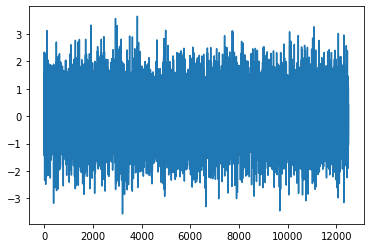

In [ ]:
plt.plot(df.iloc[:,0])

In [ ]:
len(df.iloc[:,0])

12500

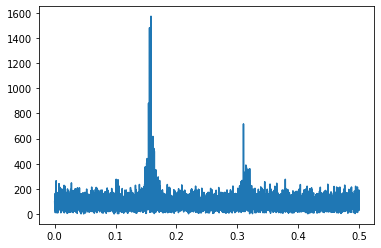

In [ ]:
rfft = np.fft.rfft(df.iloc[:,0])
rfftfreq = np.fft.rfftfreq(len(df.iloc[:,0]))
plt.plot(rfftfreq,np.absolute(rfft))

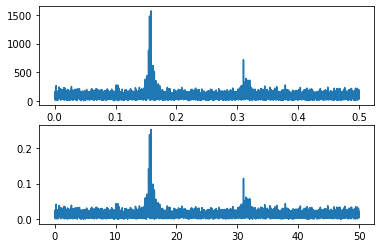

In [ ]:
N=12500
SAMPLE_RATE = 51200
x_f = signal.fft.fftfreq(N, 1 / SAMPLE_RATE)
rfft = np.fft.rfft(df.iloc[:,0])
rfftfreq = np.fft.rfftfreq(len(df.iloc[:,0]))
plt.plot(rfftfreq,np.absolute(rfft))


In [4]:
from tqdm import tqdm

In [ ]:
import numpy as np
from scipy.fftpack import fft
from scipy.signal import wiener

import tensorflow 
import keras
from keras.layers import Dense, Dropout, Flatten,Conv1D,AveragePooling1D,LSTM
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose, BatchNormalization, Activation, Input, Bidirectional, AveragePooling2D
from tensorflow import keras
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import layers, Model
from random import random

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def getFeature(sinewave):
    sample_rate = 51200
    start_time = 0
    end_time = 0.25
    time = np.arange(start_time, end_time, 1/sample_rate)

    freq = fft(sinewave)/len(time)
    hz = np.linspace(0, sample_rate/2, int(np.floor(len(time)/2)+1))
    y = 2*np.abs(freq)
    filtered_img = wiener(y)
    tmp = filtered_img
#    return moving_average(tmp[:2000],10)
    return tmp[:2000]

def getFeature3channel(data):
    return np.array(list(map(getFeature, data)))

def getFeatureDataset(dataset):
    return np.array(list(map(getFeature3channel, dataset)))

In [ ]:
from keras.models import load_model

In [ ]:
modelload = tensorflow.keras.models.load_model('Aun1.h5')

In [ ]:
final = np.load('Test_data_final.npy')

In [ ]:
final = final.transpose(0,2,1)

In [ ]:
final = getFeatureDataset(final)

In [ ]:
final = final.reshape(final.shape[0], 3, 2000,1)

In [ ]:
result = modelload.predict(final)

In [ ]:
solution=[]
filename=[]
for i in range(1800):
    solution.append(np.argmax(result[i]))
    filename.append('test_data'+str(i)+'.csv')

In [ ]:
solution1 = dict()
for i in range(len(filename)):
      solution1[filename[i]]=solution[i]

In [ ]:
import pandas as pd

In [ ]:
#Import CSV
df = pd.read_csv('sample_submission_final.csv')

#Updated 
df['code'] = df[["filename","code"]].apply(lambda x : solution1[x["filename"]] if x["filename"] in solution1.keys() else x["code"],axis=1)  

#check not null
df["code"].notnull().sum()

In [ ]:
df.to_csv('aun_submission1.csv',index=False)